In [1]:
import pandas as pd
import json
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
with open('server.log') as logfile:
    json_lines = logfile.readlines()

In [3]:
run_dicts = [json.loads(line) for line in json_lines]

run_summaries = [deepcopy(run_dict) for run_dict in run_dicts]
for d in run_summaries:
    d.pop("Round accuracies")
    d.pop("Round losses")

summary_df = pd.DataFrame(run_summaries)


In [4]:
round_results = {d["Number of Clients"]:[d["Round accuracies"], d["Round losses"]] for d in run_dicts}
print(type(list(round_results.keys())[0]))

<class 'int'>


41


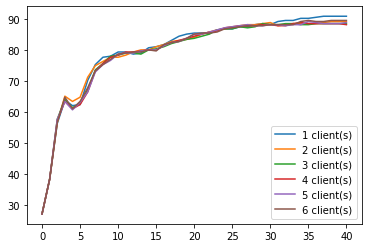

In [8]:
#Plotting results for client 1

acc_arrs = [np.array(list(round_results[i+1][0].values())) for i in range(6)]
rounds = np.array(range(41))
#loss_arr = np.array(list(round_results[1][1].values()))
print(len(acc_arrs[0]))

for i, acc_arr in enumerate(acc_arrs):
    plt.plot(rounds, acc_arr, label=f"{i+1} client(s)")
plt.legend()
plt.show()

In [10]:
print(summary_df)

   Rounds  Epochs  Number of Clients  Final Accuracy  Final loss         Time
0      40      30                  1       90.847458    0.274246    42.877765
1      40      30                  2       89.152542    0.281953    61.223549
2      40      30                  3       88.474576    0.285910   148.910804
3      40      30                  4       88.135593    0.282098   729.194485
4      40      30                  5       88.813559    0.284185  1944.554190
5      40      30                  6       89.491525    0.285215  3704.912884
6      40      30                  7       89.491525    0.284474  5941.728274
